In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import plot_confusion_matrix, classification_report
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/customer-satisfaction-data.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [6]:
df.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfaction                         False
dtype: bool

In [7]:
df = df.dropna()
df.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

In [8]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [10]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

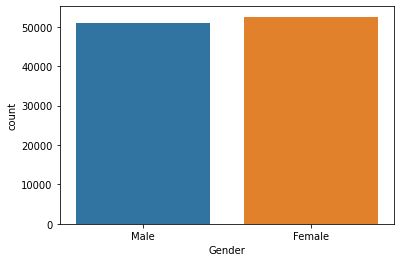

In [11]:
ax = sns.countplot(x="Gender", data=df)

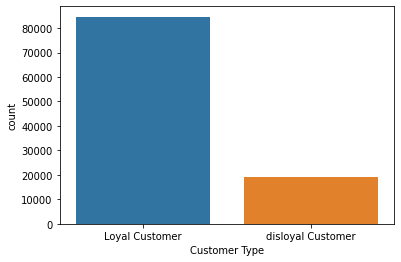

In [12]:
ax = sns.countplot(x="Customer Type", data=df)

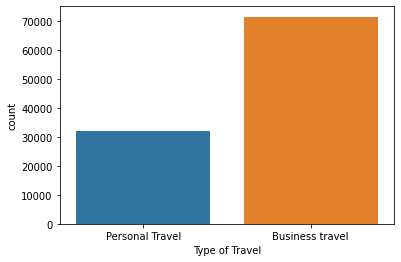

In [13]:
ax = sns.countplot(x="Type of Travel", data=df)

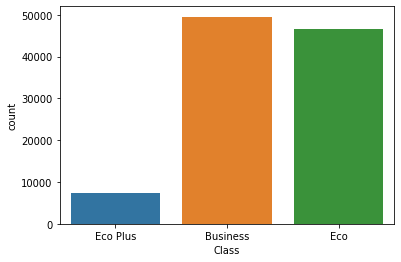

In [14]:
ax = sns.countplot(x="Class", data=df)

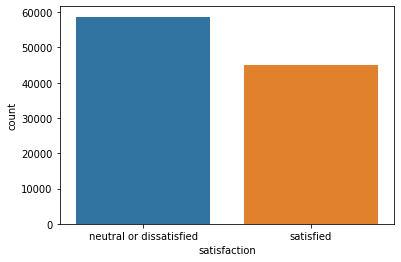

In [15]:
ax = sns.countplot(x="satisfaction", data=df)

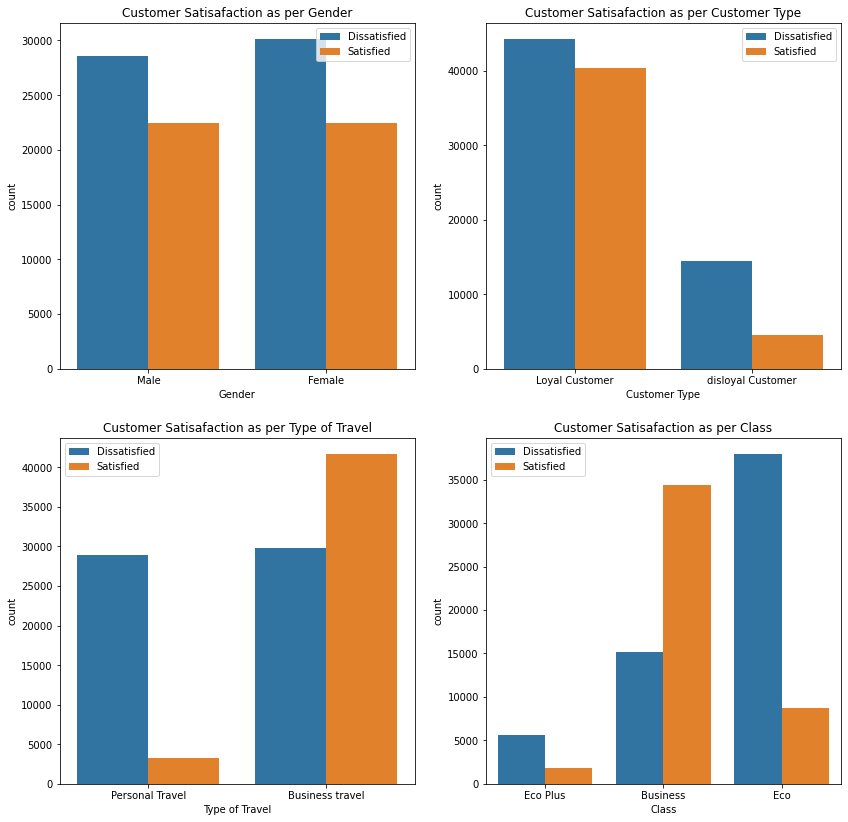

In [16]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

In [17]:
df.groupby('Class').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,,,
Business,41.575374,1676.078493,2.775221,2.905820,2.914077,2.983042,3.322835,3.716411,3.760786,3.635395,3.679608,3.644661,3.842812,3.518987,3.844447,3.477439,14.335554,14.577272
Eco,37.162986,742.843281,2.675316,3.199043,2.605091,2.972228,3.086451,2.812933,3.139399,3.098470,3.120834,3.086129,3.450153,3.122250,3.464791,3.108278,15.093147,15.672183
Eco Plus,38.657204,746.446438,2.767809,3.216256,2.662694,2.967059,3.123192,2.890198,3.184521,3.142073,3.045929,3.061328,3.363953,3.016470,3.387654,3.130557,15.329405,16.088645


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


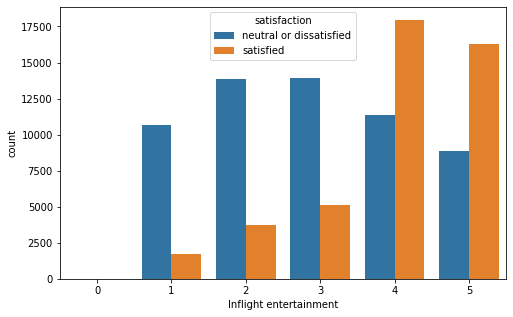

In [18]:
plt.figure(figsize=(8, 5))

x = 'Inflight entertainment'
y = 'satisfaction'
sns.countplot(x, hue = y, data = df) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


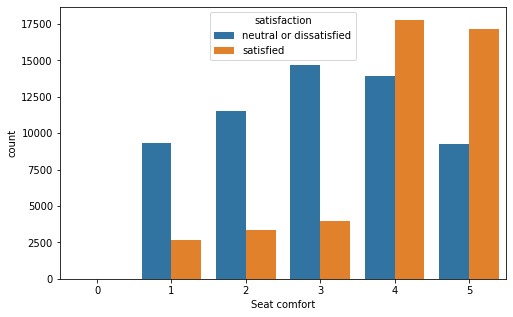

In [19]:
plt.figure(figsize=(8, 5))
x = 'Seat comfort'
y = 'satisfaction'
sns.countplot(x, hue = y, data = df) 

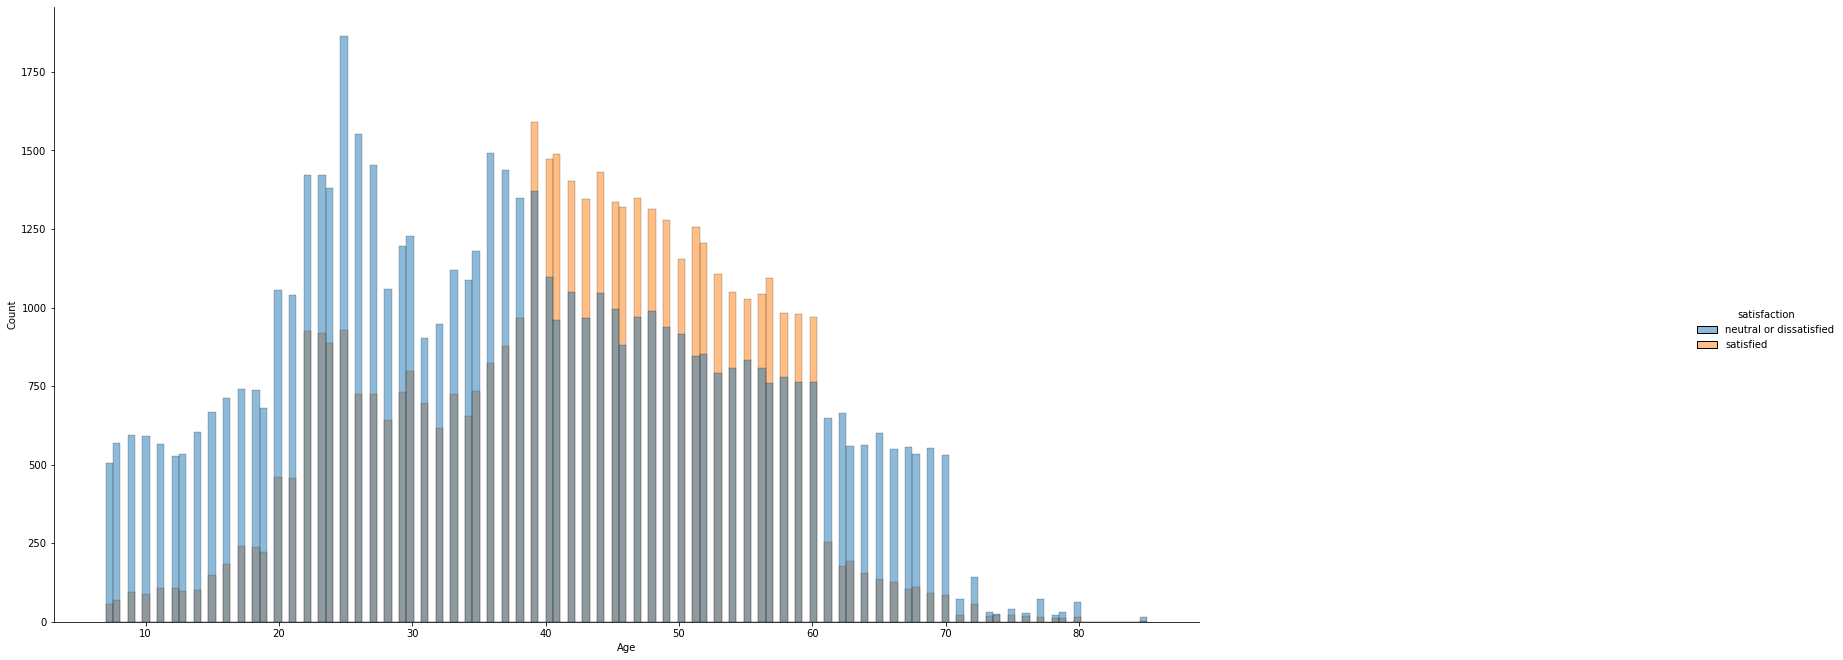

In [20]:
fg=sns.displot(df,x='Age',binwidth=0.55,hue='satisfaction')
fg.fig.set_figwidth(28)
fg.fig.set_figheight(10)
plt.show()

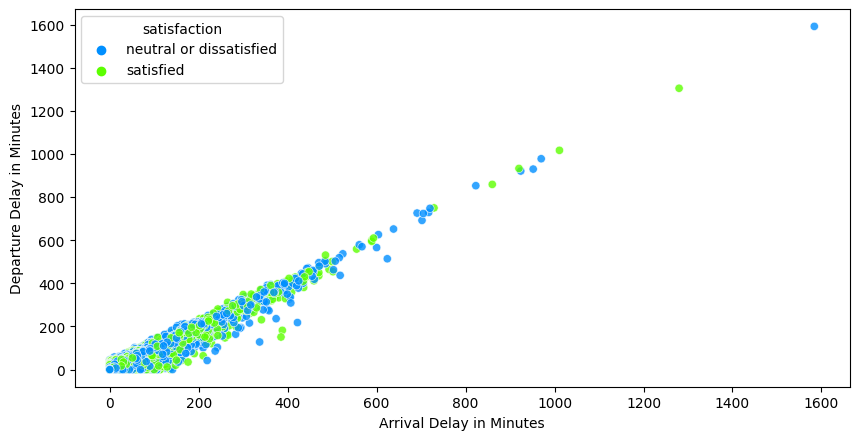

In [21]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

(0.0, 1000.0)

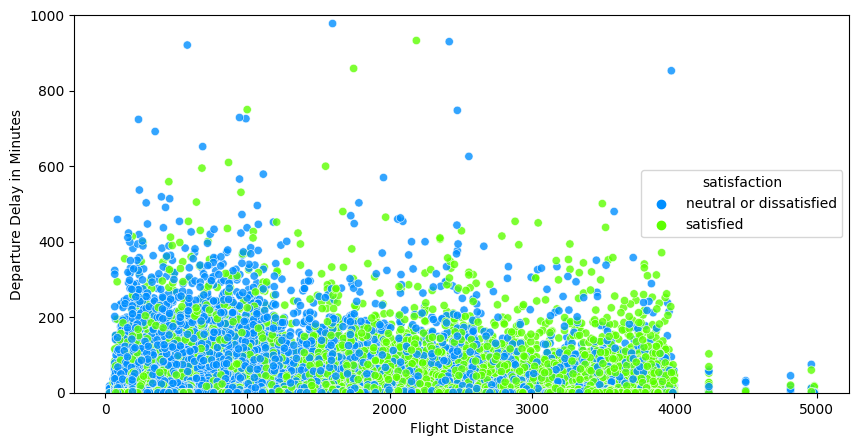

In [22]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

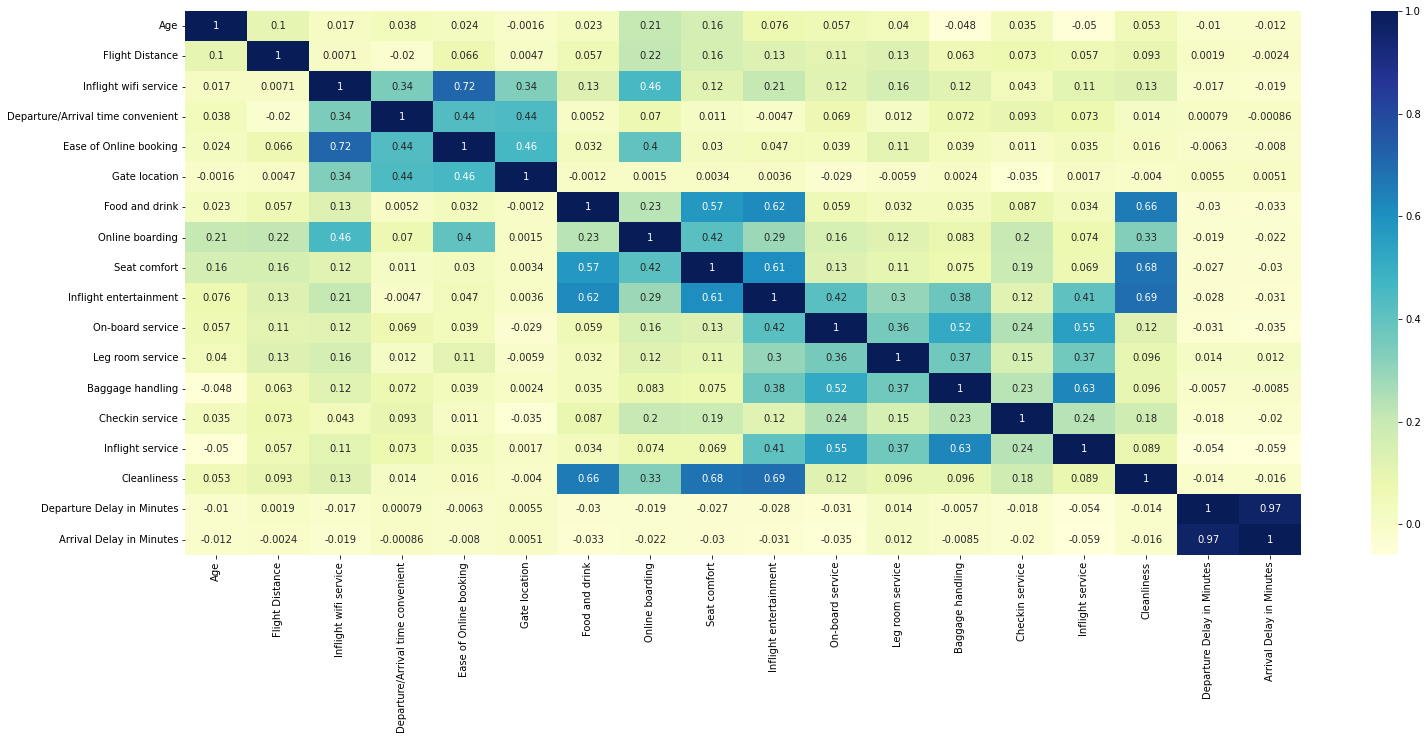

In [23]:
fig, ax = plt.subplots(figsize=(25,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [24]:
df.drop(['Flight Distance','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,3,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,2,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [51]:
target = 'satisfaction'
X = df.drop([target], axis=1) 
y = df[target]
X.shape

(103594, 17)

In [52]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,3,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied


In [53]:
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,3,4,16])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=float)

In [54]:
X.shape

(103594, 27)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=0)
sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [56]:
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()

In [57]:
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(X_train_sc,y_train)
pred_log1=log_reg1.predict(X_test_sc)

In [58]:
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[5316  586]
 [ 744 3714]]
Accuracy is 0.8716216216216216


In [59]:
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train,y_train)
pred_log2=log_reg2.predict(X_test)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is\n', accuracy_score(y_test,pred_log2))

Test Scores
Confusion Matrix is
 [[5316  586]
 [ 743 3715]]
Accuracy is
 0.8717181467181467


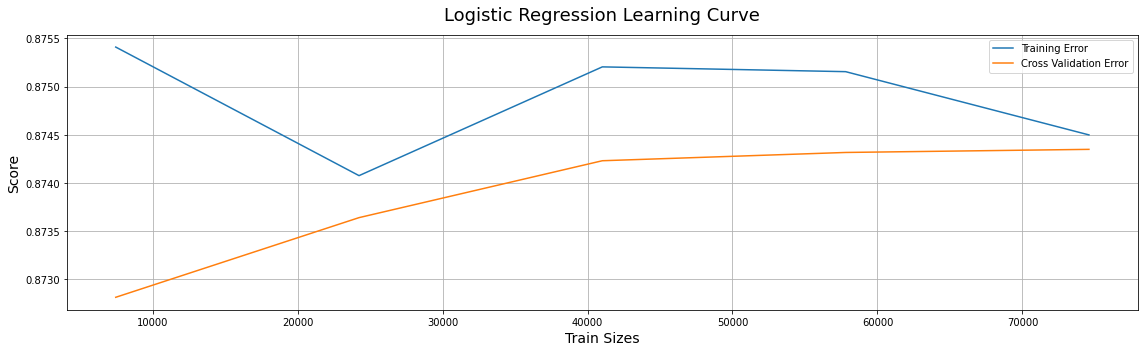

In [60]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train, y_train, log_reg2,title)

In [37]:

for k in range(10,18):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
  knn.fit(X_train_sc,y_train)
  pred_knn = knn.predict(X_test_sc)

  print("k=",k)
  print('Confusion Matrix is ',confusion_matrix(y_test,pred_knn))
  print('Accuracy is', accuracy_score(y_test,pred_knn))
  print('\n')

k= 10
Confusion Matrix is  [[5773  129]
 [ 633 3825]]
Accuracy is 0.9264478764478764


k= 11
Confusion Matrix is  [[5740  162]
 [ 586 3872]]
Accuracy is 0.9277992277992279


k= 12
Confusion Matrix is  [[5768  134]
 [ 648 3810]]
Accuracy is 0.9245173745173745


k= 13
Confusion Matrix is  [[5739  163]
 [ 595 3863]]
Accuracy is 0.9268339768339768


k= 14
Confusion Matrix is  [[5764  138]
 [ 645 3813]]
Accuracy is 0.9244208494208495


k= 15
Confusion Matrix is  [[5740  162]
 [ 596 3862]]
Accuracy is 0.9268339768339768


k= 16
Confusion Matrix is  [[5766  136]
 [ 650 3808]]
Accuracy is 0.9241312741312742


k= 17
Confusion Matrix is  [[5731  171]
 [ 604 3854]]
Accuracy is 0.9251930501930502




In [38]:
knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,y_train)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,knn_test))
print('Accuracy is', accuracy_score(y_test,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,knn_train))
print('Accuracy is', accuracy_score(y_train,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[5740  162]
 [ 586 3872]]
Accuracy is 0.9277992277992279


For Train
Confusion Matrix is
  [[51562  1233]
 [ 4879 35560]]
Accuracy is 0.9344445159491173




In [39]:
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(accuracy_score(y_test,pred_dtc))

d= 20
0.9575289575289575
d= 21
0.9579150579150579
d= 22
0.9581081081081081
d= 23
0.9573359073359073
d= 24
0.9578185328185328
d= 25
0.9581081081081081
d= 26
0.9574324324324325
d= 27
0.9573359073359073
d= 28
0.9582046332046332
d= 29
0.9583976833976834


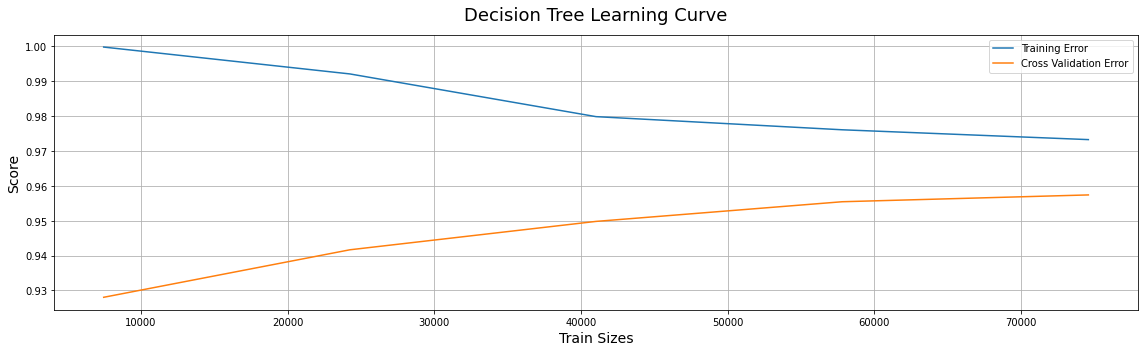

In [40]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

In [41]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)
rfc.fit(X_train_sc, y_train)
pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))
print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))

Test Score: 0.9617760617760618
Train Score: 0.9942939271081365
Confusion Matrix for test set  
 [[5794  108]
 [ 288 4170]]


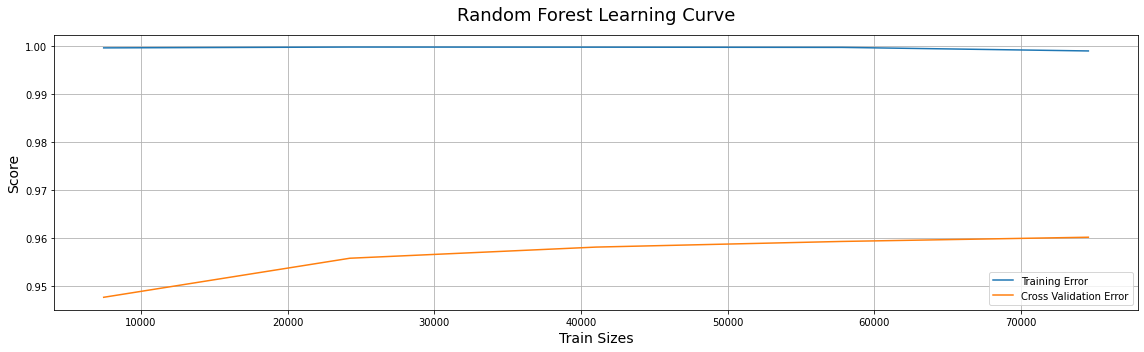

In [42]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train, y_train, rfc,title)

In [43]:
model_xgb = XGBClassifier(random_state = 2)
model_xgb.fit(X_train_minmax,y_train)

XGBClassifier(random_state=2)

In [44]:
pred_xgb = model_xgb.predict(X_test_minmax)
accuracy_score(y_test,pred_xgb)

0.9395752895752896

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


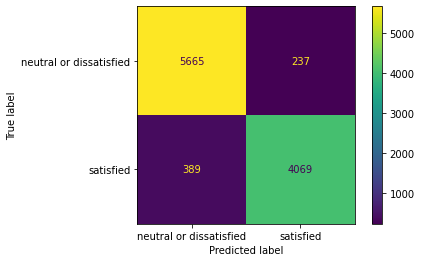

In [45]:
plot_confusion_matrix(model_xgb,X_test_minmax,y_test)

In [46]:
print(classification_report(y_test,pred_xgb))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95      5902
              satisfied       0.94      0.91      0.93      4458

               accuracy                           0.94     10360
              macro avg       0.94      0.94      0.94     10360
           weighted avg       0.94      0.94      0.94     10360



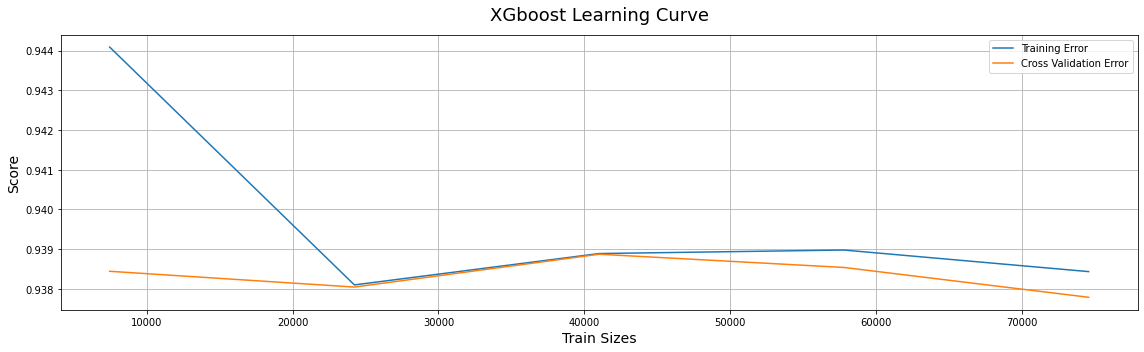

In [47]:
plt.figure(figsize = (16,5))
title = 'XGboost Learning Curve'
plotLearningCurves(X_train, y_train, model_xgb,title)